In [1]:
# import required libraries

import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
# Read dataset

with open('../data/strogatz_extended.json') as strogatz:
    data = np.array(json.load(strogatz))

In [3]:
# some prelimnary analysis
print("Type of data:", type(data))
print()

print("Shape of data:", data.shape)
print()

print("Type of records:", type(data[0]))
print()

print("Kyes of records:", data[0].keys())
print()

print("First data record:")
pprint(data[0])

Type of data: <class 'numpy.ndarray'>

Shape of data: (63,)

Type of records: <class 'dict'>

Kyes of records: dict_keys(['id', 'eq', 'dim', 'consts', 'init', 'init_constraints', 'const_constraints', 'eq_description', 'const_description', 'var_description', 'source', 'substituted', 'solutions'])

First data record:
{'const_constraints': 'c_1 > 0, c_2 > 0',
 'const_description': 'c_0: fixed voltage source, c_1: capacitance, c_2: '
                      'resistance',
 'consts': [[0.7, 1.2, 2.31]],
 'dim': 1,
 'eq': '(c_0 - x_0 / c_1) / c_2',
 'eq_description': 'RC-circuit (charging capacitor)',
 'id': 1,
 'init': [[10.0], [3.54]],
 'init_constraints': 'x_0 > 0',
 'solutions': [[{'consts': [0.7, 1.2, 2.31],
                 'init': [10.0],
                 'message': 'The solver successfully reached the end of the '
                            'integration interval.',
                 'nfev': 53,
                 'njev': 0,
                 'nlu': 0,
                 'status': 0,
        

In [4]:
data[0].keys()

dict_keys(['id', 'eq', 'dim', 'consts', 'init', 'init_constraints', 'const_constraints', 'eq_description', 'const_description', 'var_description', 'source', 'substituted', 'solutions'])

<class 'list'>
<class 'list'>
1
1
<class 'list'>
<class 'list'>
2
2
Number of init values in 1D: 2
Number of init values in 2D: 2
The length of second list corresponds to the number of initial values.
<class 'dict'>
<class 'dict'>
dict_keys(['success', 'message', 't', 'y', 'nfev', 'njev', 'nlu', 'status', 'consts', 'init'])
dict_keys(['success', 'message', 't', 'y', 'nfev', 'njev', 'nlu', 'status', 'consts', 'init'])
Keys of interest are: t, y, init, consts (for now)
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
512
512
1
2
512
512
512


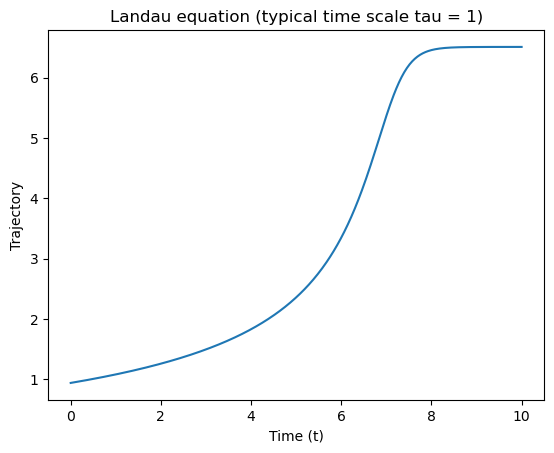

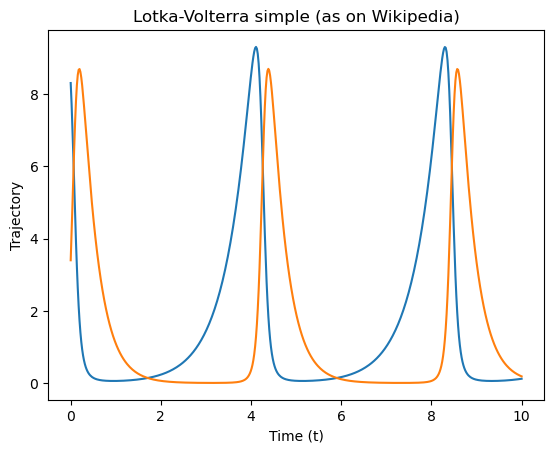

In [5]:
# Deep Dive into each record (Done only for one 1D and one 2D equation). The inferences can be generalized to other dimensions also
ode_1d = data[15] # landau equation
ode_2d = data[26] # Lotka-Volteraa

solutions_1d = ode_1d.get('solutions')
solutions_2d = ode_2d.get('solutions')

print(type(solutions_1d))
print(type(solutions_2d))

print(len(solutions_1d))
print(len(solutions_2d))

solutions_1d_breakdown = solutions_1d[0]
solutions_2d_breakdown = solutions_2d[0]

print(type(solutions_1d_breakdown))
print(type(solutions_2d_breakdown))

print(len(solutions_1d_breakdown))
print(len(solutions_2d_breakdown))

print("Number of init values in 1D:", len(ode_1d.get('init')))
print("Number of init values in 2D:", len(ode_2d.get('init')))
print("The length of second list corresponds to the number of initial values.")

# Considering only first initial value
solutions_1d_1 = solutions_1d_breakdown[0]
solutions_2d_1 = solutions_2d_breakdown[0]

print(type(solutions_1d_1))
print(type(solutions_2d_1))

print(solutions_1d_1.keys())
print(solutions_2d_1.keys())

print("Keys of interest are: t, y, init, consts (for now)")

t_1d = solutions_1d_1.get('t')
t_2d = solutions_2d_1.get('t')

y_1d = solutions_1d_1.get('y')
y_2d = solutions_2d_1.get('y')

print(type(t_1d))
print(type(t_2d))

print(type(y_2d))
print(type(y_2d))

print(len(t_1d))
print(len(t_2d))

print(len(y_1d))
print(len(y_2d))

trajectory_1d = y_1d[0]
print(len(trajectory_1d))

trajectory_2d_1 = y_2d[0]
trajectory_2d_2 = y_2d[1]
print(len(trajectory_2d_1))
print(len(trajectory_2d_2))

# Plot 1D
plt.xlabel("Time (t)")
plt.ylabel("Trajectory")
plt.title(ode_1d.get("eq_description"))
plt.plot(t_1d, trajectory_1d)
plt.show()

# Plot 2D
plt.xlabel("Time (t)")
plt.ylabel("Trajectory")
plt.title(ode_2d.get('eq_description'))
plt.plot(t_2d, trajectory_2d_1)
plt.plot(t_2d, trajectory_2d_2)
plt.show()

### Final Remarks
* Following is the generic required structure of the data
* "solutions": list of list (length of second list is same as the number of initial values)
    * "t": list (length corresponds to the number of data points)
    * "y": list (length is same as number of dimensions)

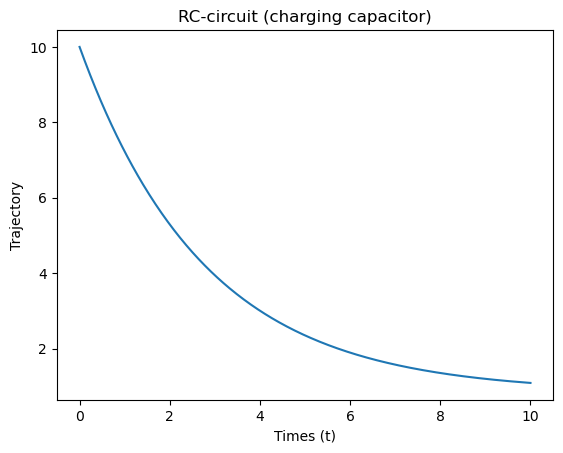

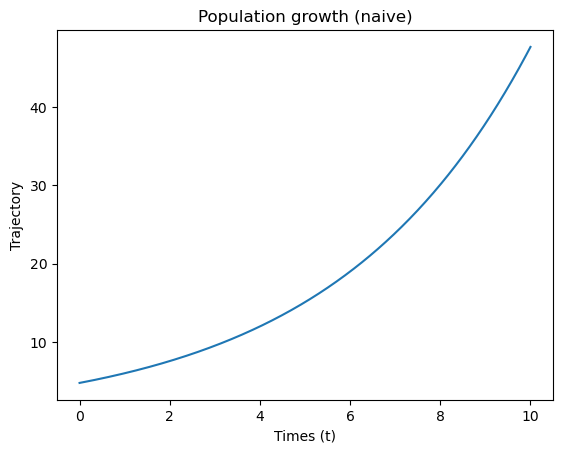

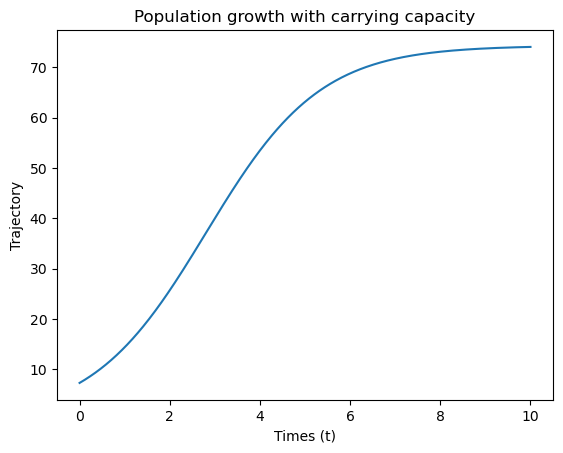

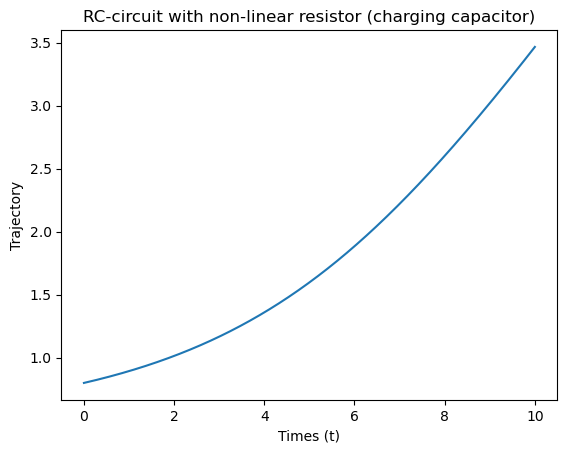

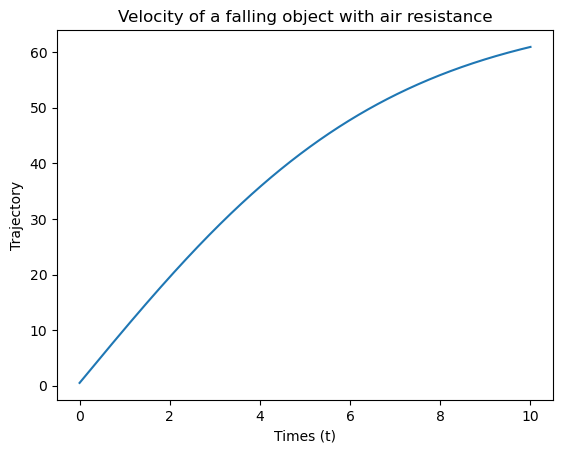

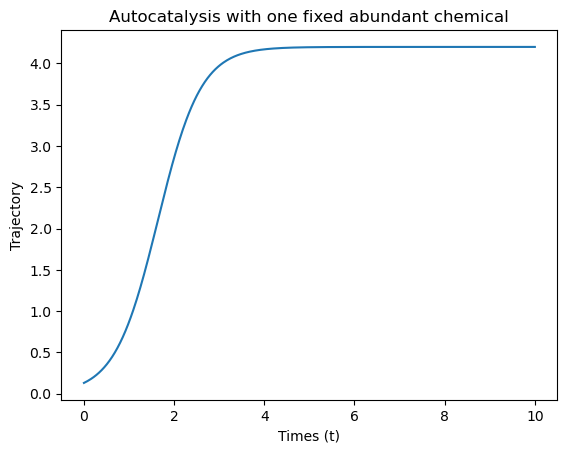

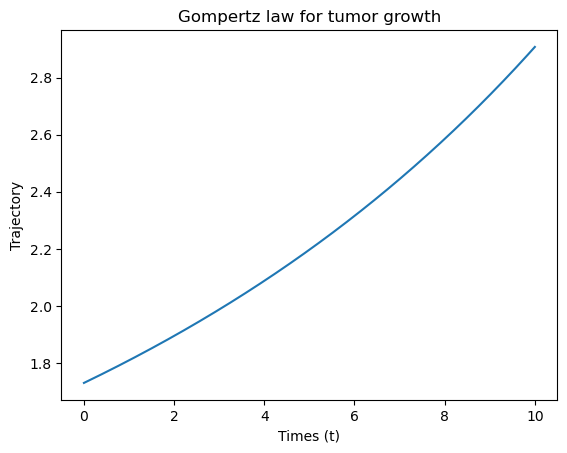

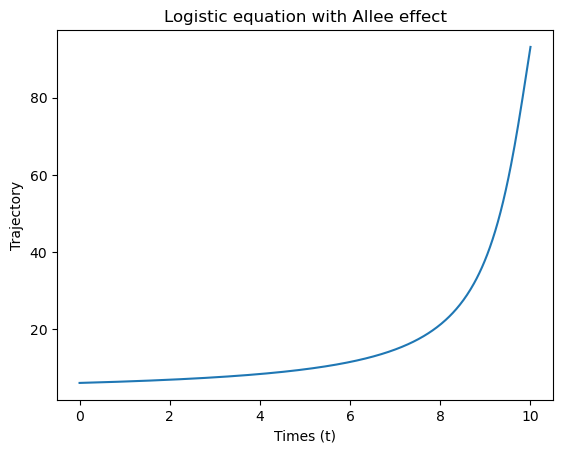

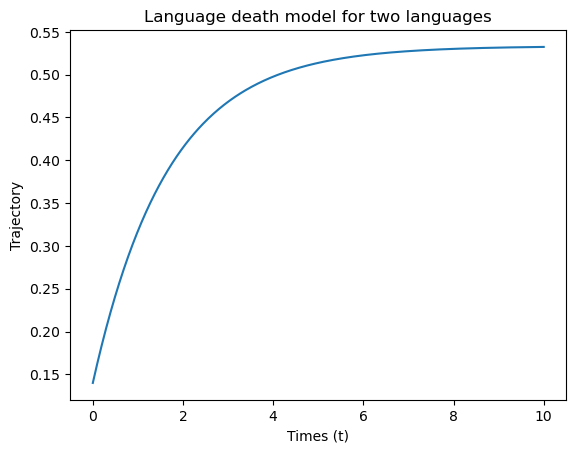

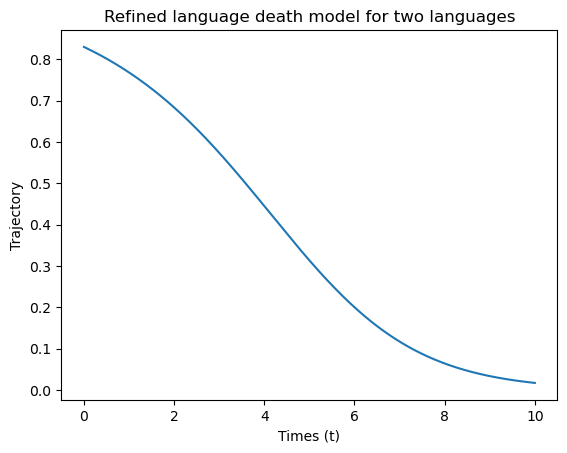

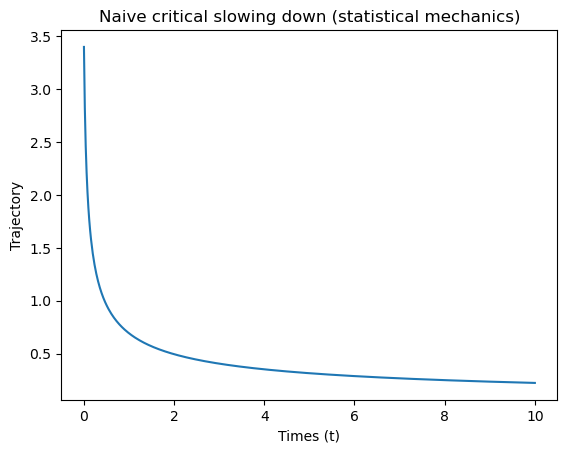

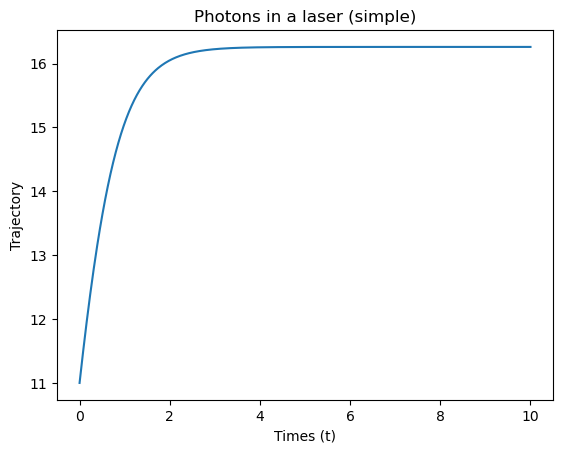

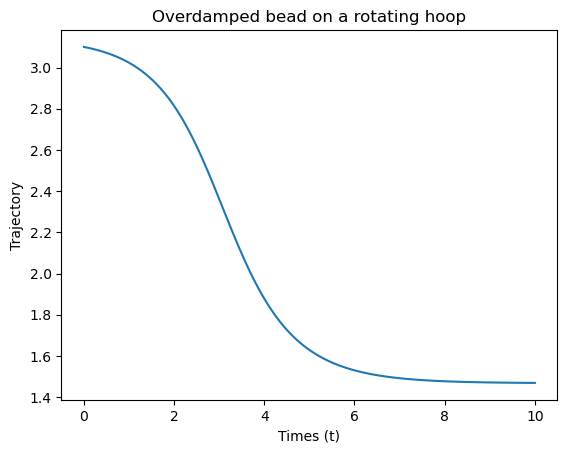

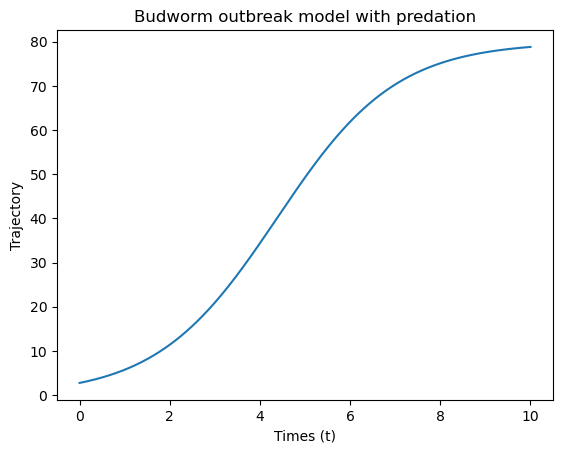

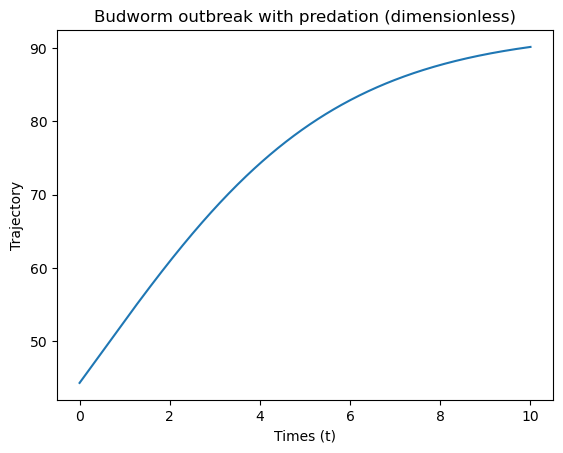

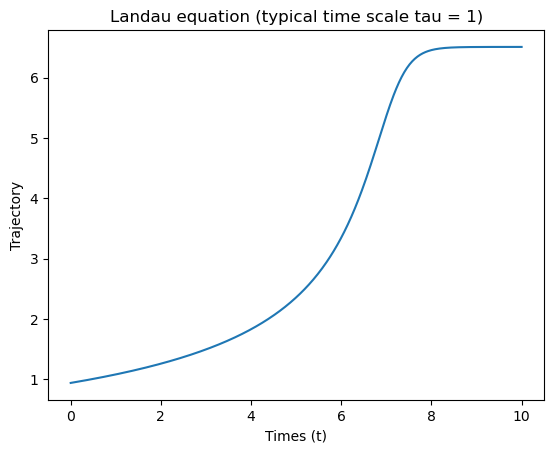

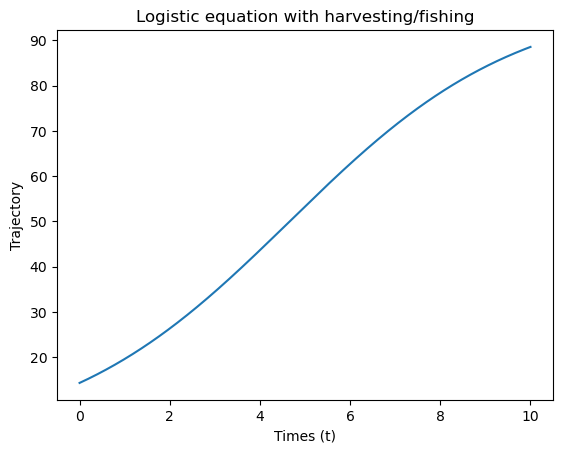

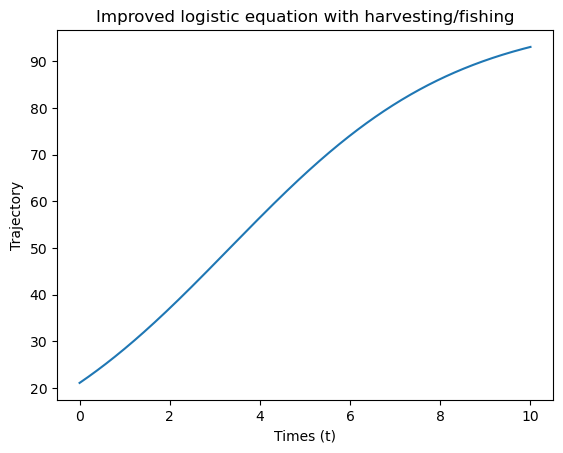

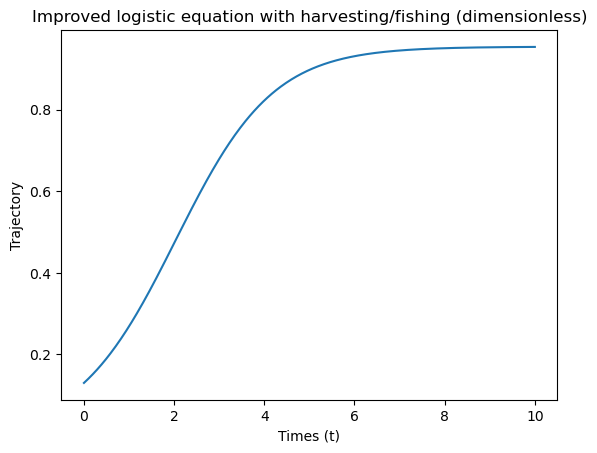

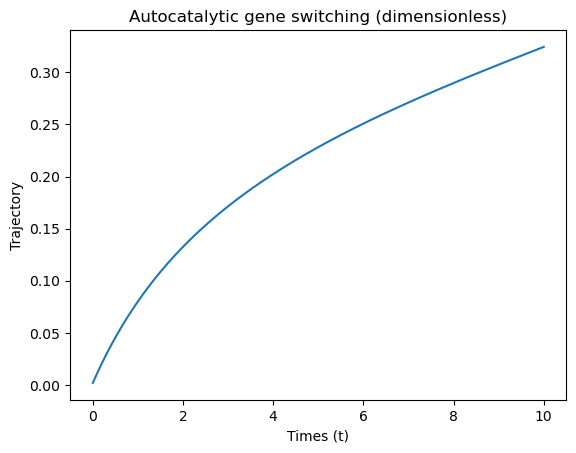

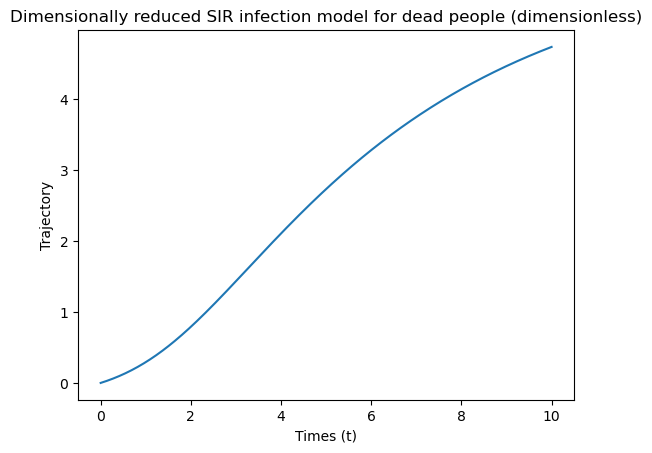

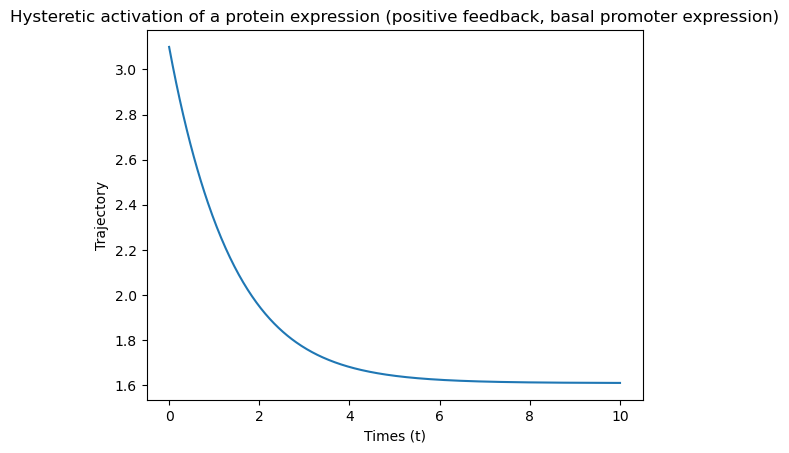

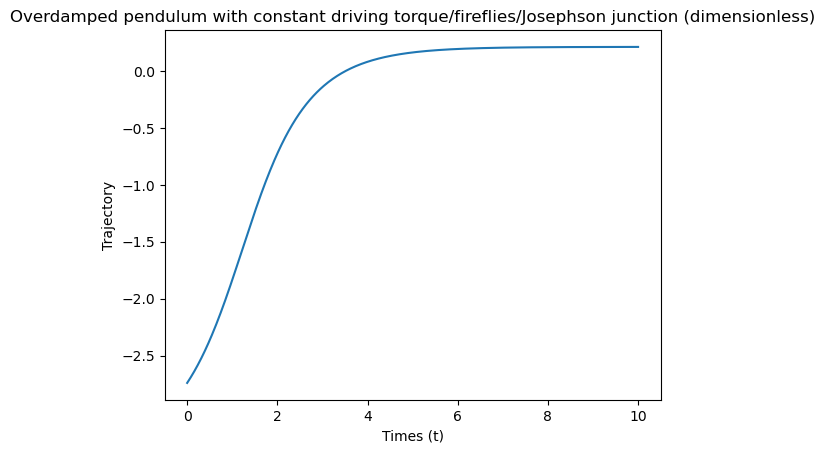

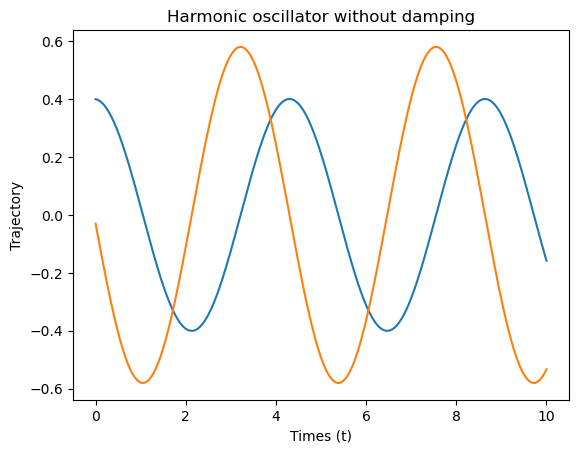

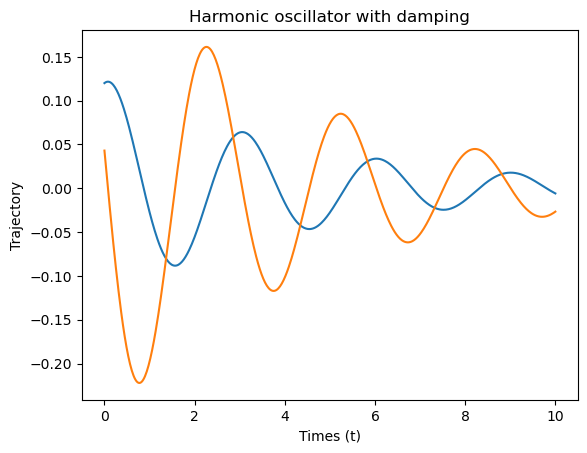

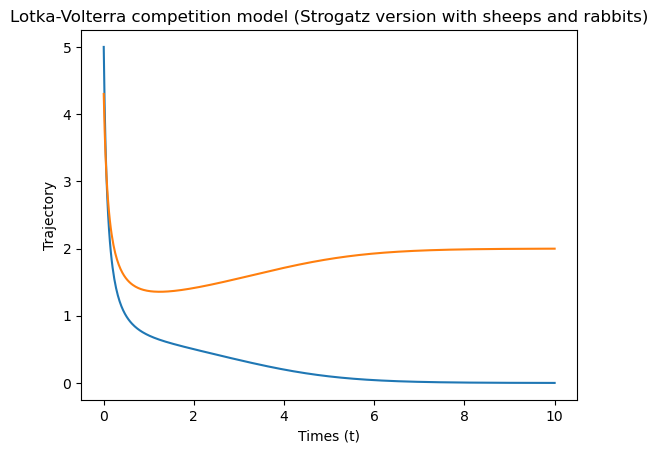

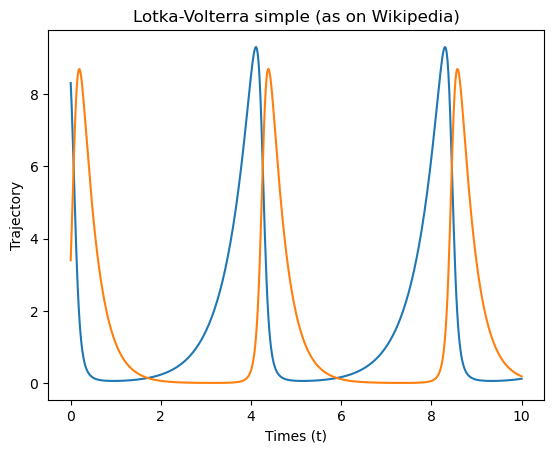

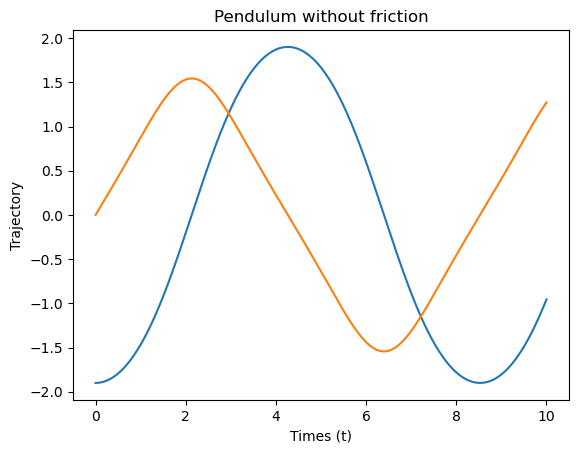

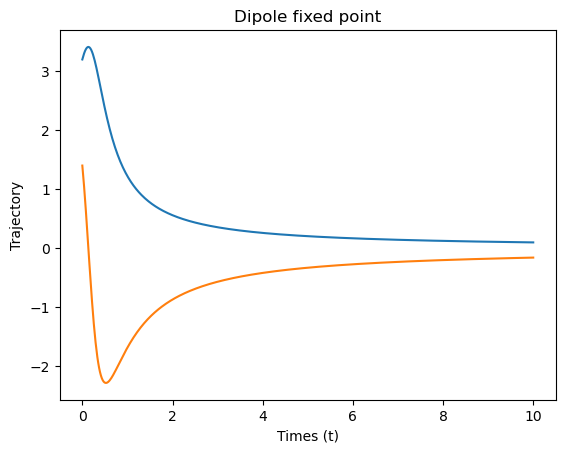

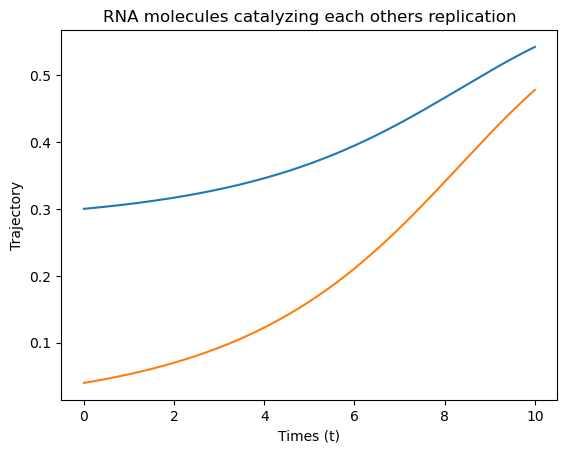

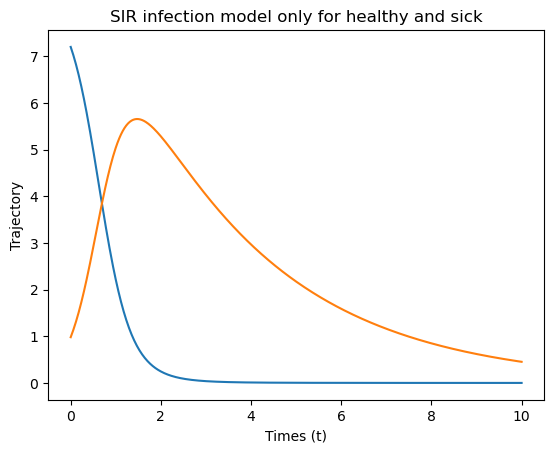

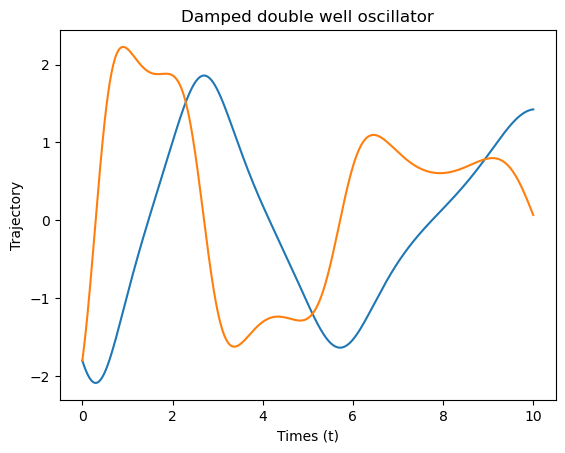

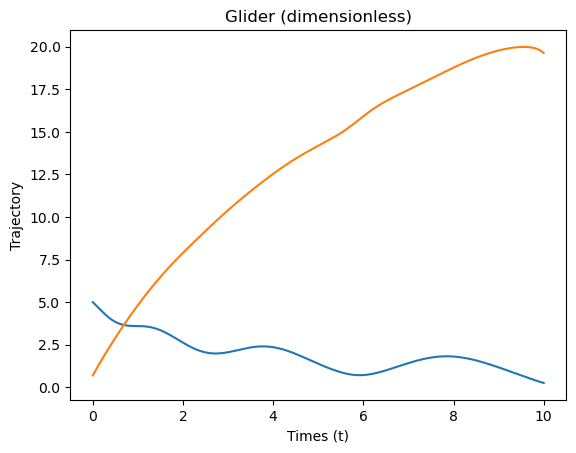

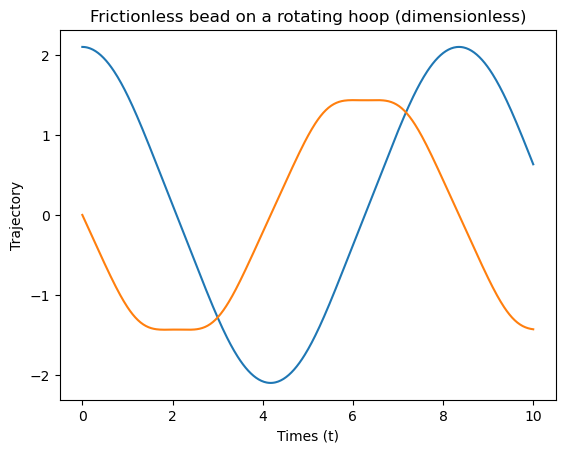

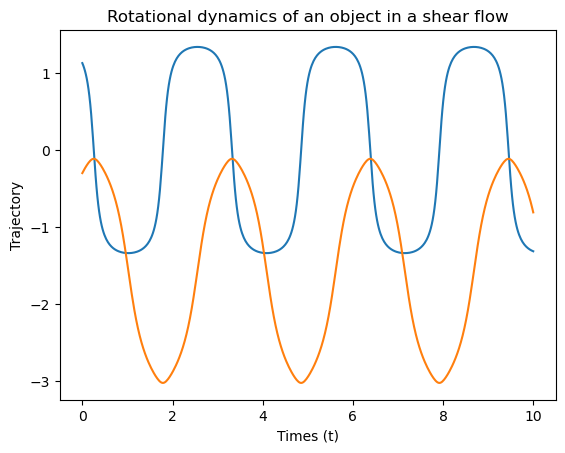

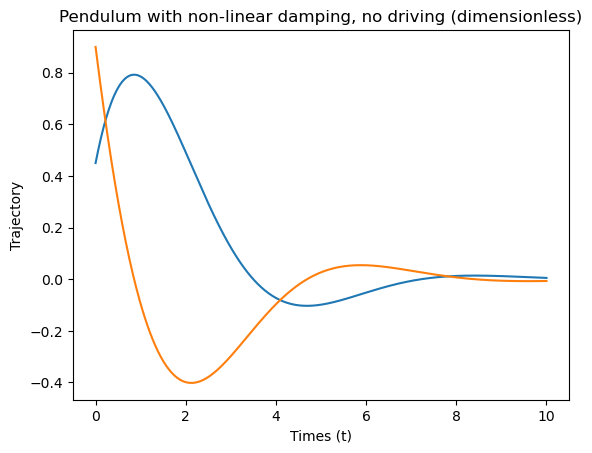

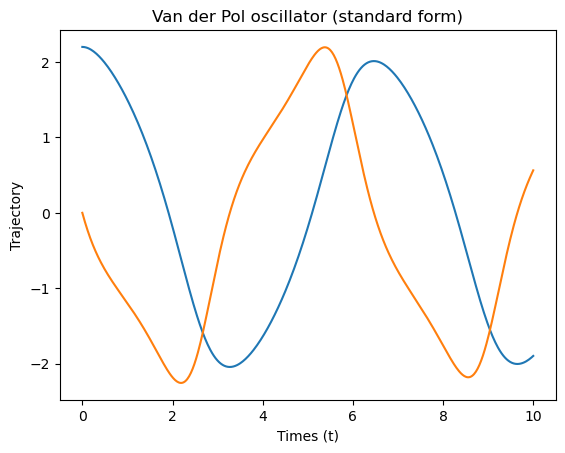

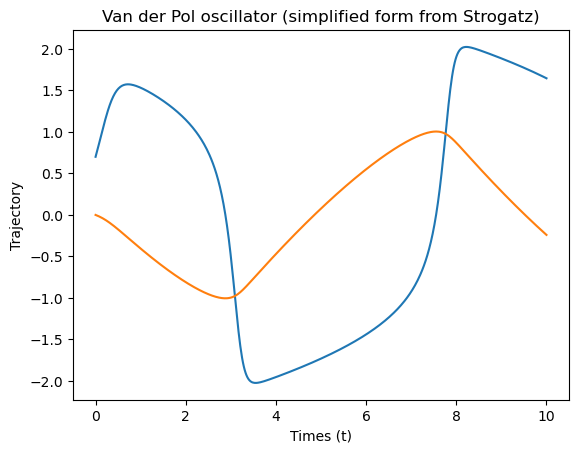

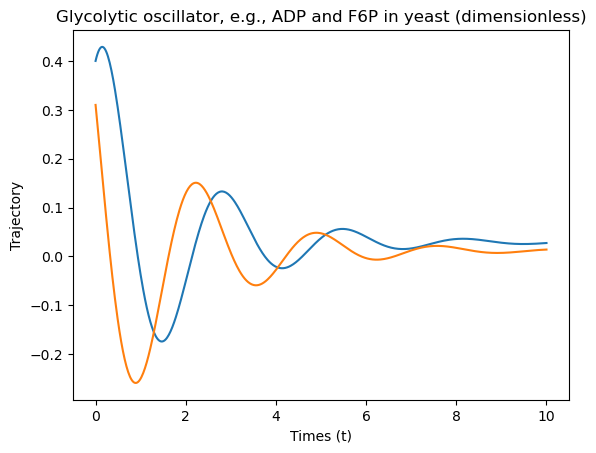

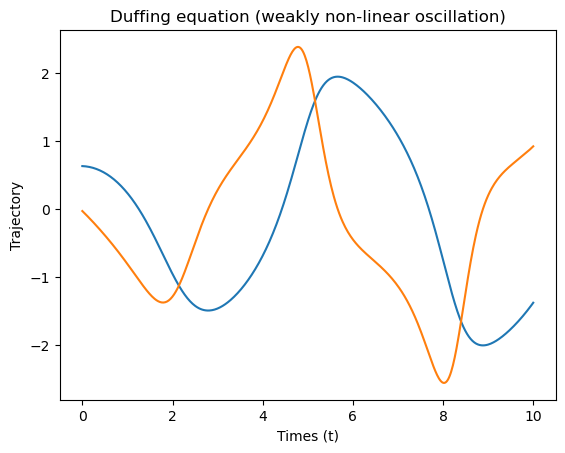

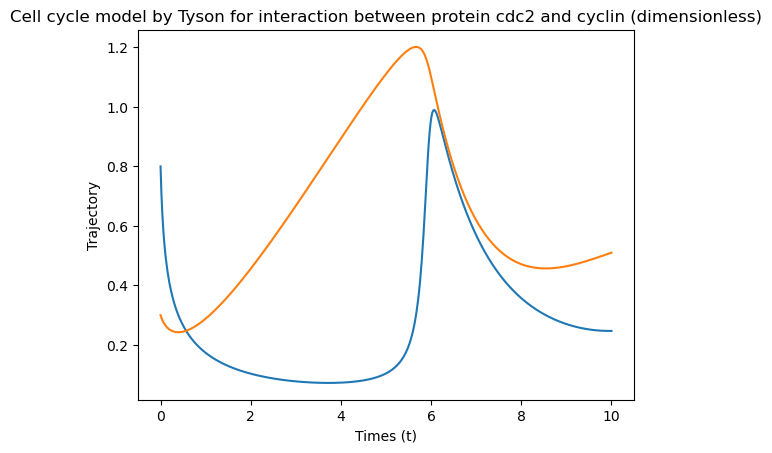

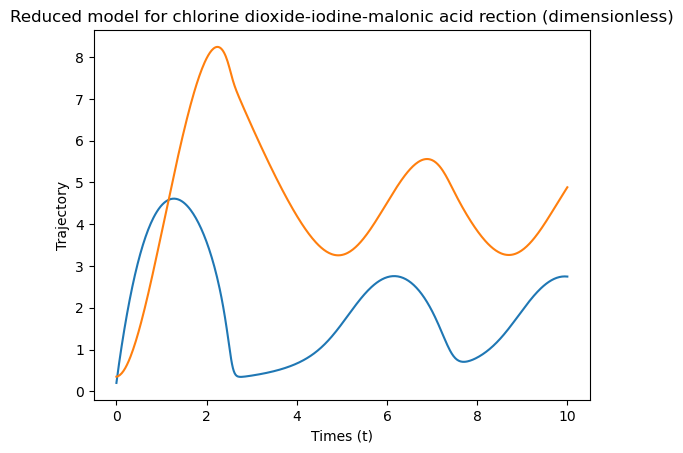

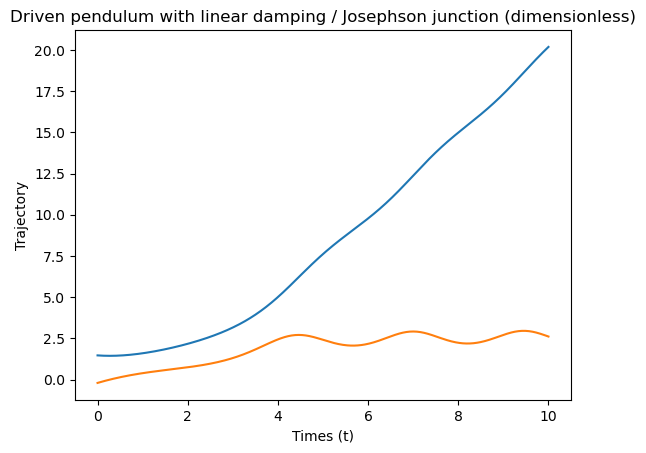

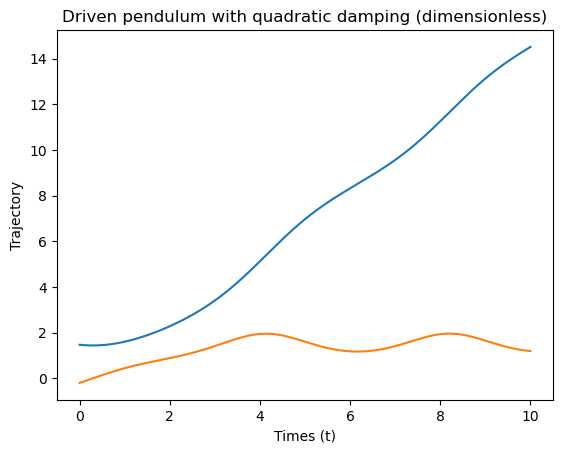

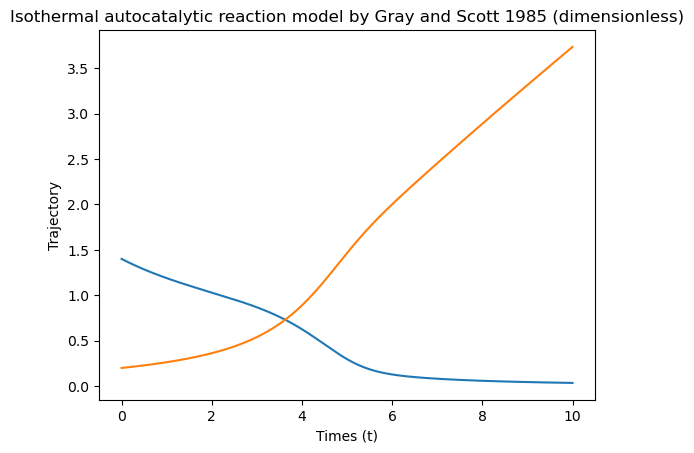

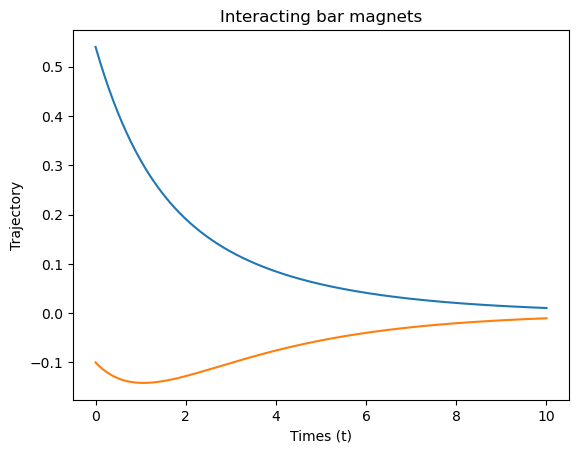

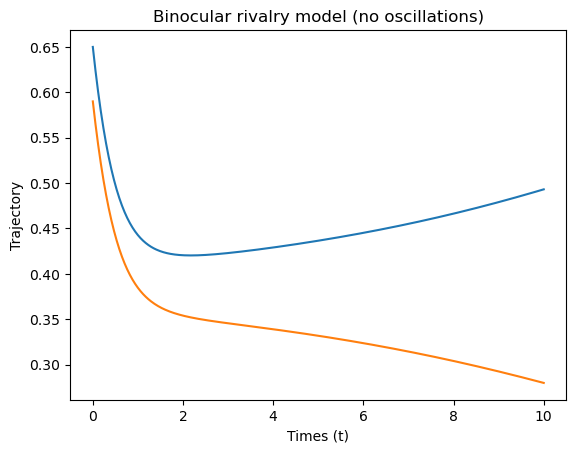

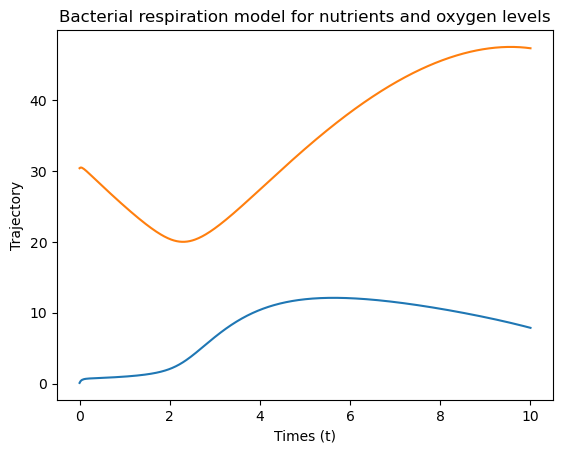

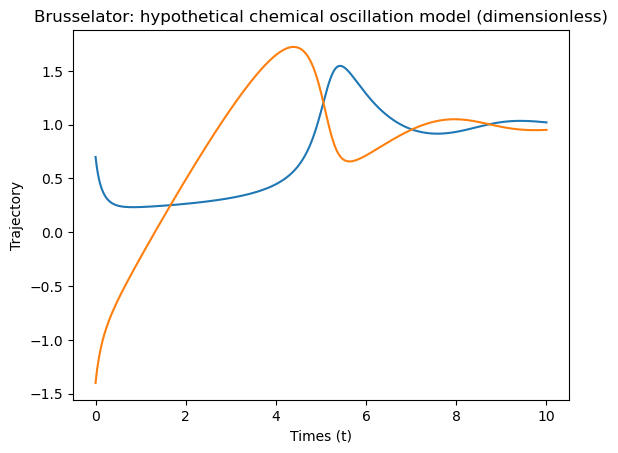

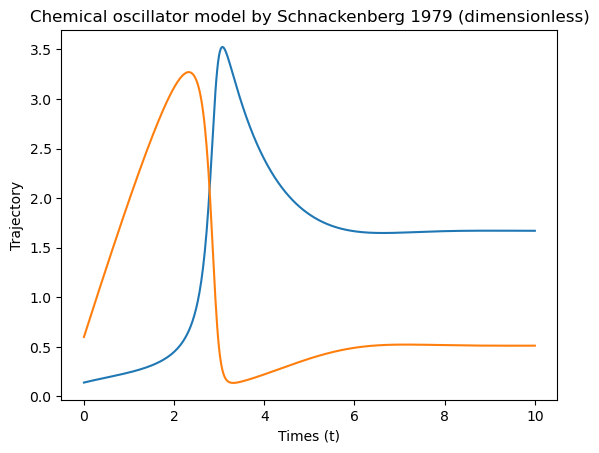

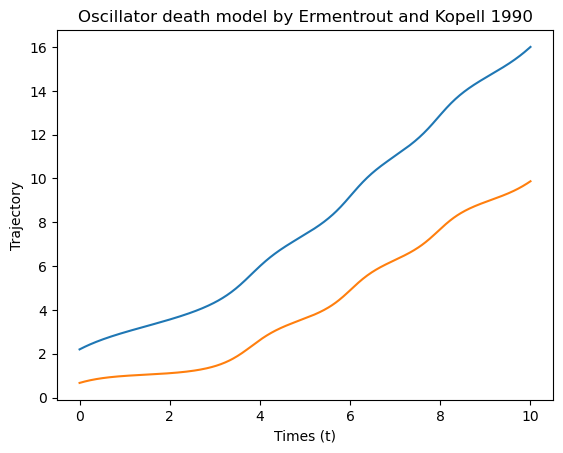

In [6]:
# Plot Trajectories for 1 and 2 dimensional equation
for ode in data:
    t = ode.get('solutions')[0][0].get('t')
    if int(ode.get('dim')) == 1:
        trajectory = ode.get('solutions')[0][0].get('y')[0]
        plt.xlabel("Times (t)")
        plt.ylabel('Trajectory')
        plt.plot(t, trajectory)
        plt.title(ode.get('eq_description'))
        plt.show()
    elif int(ode.get('dim')) == 2:
        trajectory_1 = ode.get('solutions')[0][0].get('y')[0]
        trajectory_2 = ode.get('solutions')[0][0].get('y')[1]
        plt.xlabel("Times (t)")
        plt.ylabel('Trajectory')
        plt.plot(t, trajectory_1)
        plt.plot(t, trajectory_2)
        plt.title(ode.get('eq_description'))
        plt.show()